# **CUSTOMER CHURN PREDICTION**

| Variable                  | Description |
|---------------------------|-------------|
| **AccountID**             | Account unique identifier |
| **Churn**                 | Account churn flag (Target) |
| **Tenure**                | Tenure of account |
| **City_Tier**             | Tier of primary customer's city |
| **CC_Contacted_L12m**     | How many times all the customers of the account have contacted customer care in the last 12 months |
| **Payment**               | Preferred payment mode of the customers in the account |
| **Gender**                | Gender of the primary customer of the account |
| **Service_Score**         | Satisfaction score given by customers of the account on service provided by the company |
| **Account_user_count**    | Number of customers tagged with this account |
| **account_segment**       | Account segmentation on the basis of spend |
| **CC_Agent_Score**        | Satisfaction score given by customers of the account on customer care service provided by the company |
| **Marital_Status**        | Marital status of the primary customer of the account |
| **rev_per_month**         | Monthly average revenue generated by the account in the last 12 months |
| **Complain_l12m**         | Any complaints raised by the account in the last 12 months |
| **rev_growth_yoy**        | Revenue growth percentage of the account (last 12 months vs last 24 to 13 months) |
| **coupon_used_l12m**      | How many times customers have used coupons to make payments in the last 12 months |
| **Day_Since_CC_connect**  | Number of days since no customers in the account have contacted customer care |
| **cashback_l12m**         | Monthly average cashback generated by the account in the last 12 months |
| **Login_device**          | Preferred login device of the customers in the account |


**Importing necessary Libraries**

In [1]:
#For numerical operations
import numpy as np
import pandas as pd

#For data visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#For Data Preprocessing
from sklearn.cluster import KMeans
# from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score

import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

#setting up the enivornment
import os
pd.set_option('display.max_columns',None)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import joblib

## **Clustering**

In [2]:
# Reading the Scaled data for Clustering
data_train_scaled = pd.read_csv('../data/processed/data_train_scaled.csv')
X_train_cluster = data_train_scaled.drop(['Churn'],axis = 1)
y_train = data_train_scaled['Churn']

### **Checking Elbow Plot**

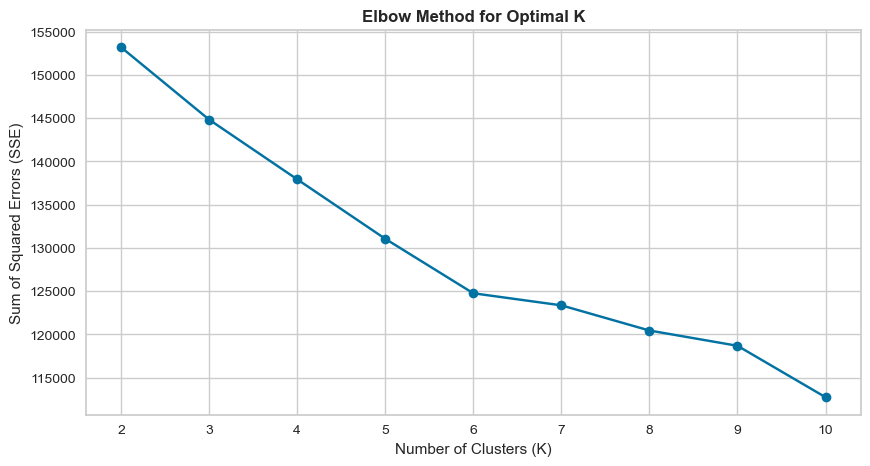

In [3]:
# @title
# Elbow Method
sse = []
k_values = range(2, 11)  # Test K from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_cluster)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K' ,fontweight='bold')
plt.show()

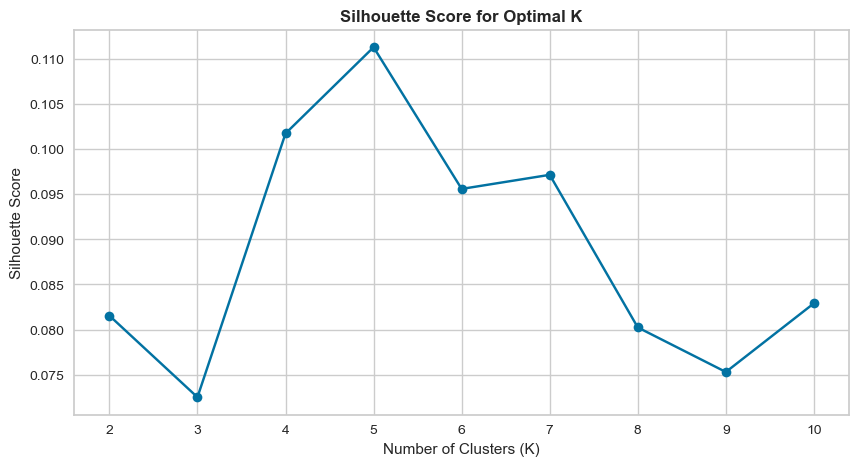

Optimal number of clusters (K) based on Silhouette Score: 5


In [4]:
# @title
# Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_cluster)
    silhouette_avg = silhouette_score(X_train_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K',fontweight='bold')
plt.show()

# Optimal K based on Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K) based on Silhouette Score: {optimal_k}")

**Obeservations:**

From the two graphs:

**Elbow Method:** The SSE (Sum of Squared Errors) curve starts flattening significantly around K = 5 or 6, suggesting a good balance between reducing error and avoiding too many clusters.

**Silhouette Score:** The highest Silhouette Score is at K = 5, indicating the best cluster separation.

### **Cluster profiling**

In [5]:
# @title
# Creating Final Model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_cluster)

KMeans(n_clusters=5, random_state=42)

In [6]:

# adding kmeans cluster labels to the original dataframe
data_train_processed = pd.read_csv('../data/processed/data_train_processed.csv')

data_kmeans = data_train_processed.copy()
data_kmeans["Cluster"] = kmeans.labels_

In [7]:
#Saving the file with clustering output
data_kmeans.to_csv('../data/processed/data_train_clusters.csv',index=False)
print("Saved the data with clustering to data/processed/data_train_cluster.csv")

joblib.dump(kmeans, '../models/kmeans_model.pkl')
print("Saved the KMeans model")

Saved the data with clustering to data/processed/data_train_cluster.csv
Saved the KMeans model


In [8]:
# @title
data_kmeans.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,Cluster
0,9.0,3.0,10.0,Wallet,Male,4.0,4.0,HNI,4.0,Divorced,6.0,0.0,14.0,2.0,7.0,201.95,Mobile,0,2
1,8.0,1.0,14.0,DC,Female,2.0,3.0,Super,3.0,Married,2.0,0.0,12.0,2.0,9.0,141.48,Computer,0,3
2,3.0,1.0,9.0,DC,Male,2.0,5.0,Regular Plus,3.0,Divorced,5.0,0.0,23.0,1.0,2.0,145.33,Mobile,0,3
3,1.0,1.0,30.0,DC,Male,4.0,4.0,Super,3.0,Single,3.0,0.0,15.0,2.0,3.0,165.13,Mobile,0,3
4,10.0,3.0,16.0,Wallet,Male,3.0,4.0,HNI,1.0,Married,6.0,0.0,12.0,5.0,4.0,225.96,Mobile,1,2


In [9]:
# @title
#Generate Cluster Profile Report
num_columns = data_kmeans.select_dtypes(exclude=["object","category"]).columns.to_list()
cat_columns = data_kmeans.select_dtypes(include=["object","category"]).columns.to_list()
cluster_profile_num_summary = data_kmeans.groupby('Cluster')[num_columns].mean()


# Step 2: Create a summary table
summary_table = cluster_profile_num_summary

# Step 3: Highlight maximum and minimum values in each row
def highlight_max_min(row):
    color_max = 'background-color: lightgreen'
    color_min = 'background-color: yellow'
    styles = []
    for val in row:
        if isinstance(val, (int, float)):
            if val == row.max():
                styles.append(color_max)
            elif val == row.min():
                styles.append(color_min)
            else:
                styles.append('')
        else:
            styles.append('')
    return styles

# Apply highlighting to the summary table
styled_table = summary_table.style.apply(highlight_max_min, axis=0)

# Display the styled table
print('Cluster Profiling for Numerical Columns:')
styled_table.format("{:.4f}")

Cluster Profiling for Numerical Columns:


,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Churn,Cluster
Cluster,,,,,,,,,,,,,,
0,10.3833,1.4968,17.4590,2.8596,3.7413,3.1435,5.1404,0.2508,15.6041,1.7319,4.5994,171.7259,0.2650,0.0000
1,15.5596,1.5092,16.2155,3.1411,3.9571,3.0923,6.6195,0.2529,16.6504,2.7900,6.4628,218.6408,0.1012,1.0000
2,11.4824,2.9892,19.2304,2.9187,3.7561,3.1098,5.1721,0.2737,15.8713,1.6558,4.8279,187.0478,0.2060,2.0000
3,8.4835,1.4686,18.4737,2.7697,3.5326,3.0006,4.5601,0.2811,16.1451,1.0075,3.3152,157.2780,0.1823,3.0000
4,10.0983,1.6358,17.8295,2.8699,3.8353,3.0665,5.0751,0.2775,16.2948,1.5405,4.2399,174.9921,0.1618,4.0000


In [10]:
# @title
cluster_profiles_cat_summary = data_kmeans.groupby('Cluster').apply(lambda x: x.select_dtypes(include=['object','category']).apply(lambda col: col.value_counts())).unstack()

#Create a summary table
summary_table_cat = cluster_profiles_cat_summary.fillna(0)  # Replace NaN with 0 for better visualization

summary_table_cat = summary_table_cat.loc[:, (summary_table_cat != 0).any(axis=0)]

# Define the styling function
def highlight_max_min(row):
    color_max = 'background-color: lightgreen'
    color_min = 'background-color: yellow'
    styles = []
    for val in row:
        if isinstance(val, (int, float)):
            if val == row.max():
                styles.append(color_max)
            elif val == row.min():
                styles.append(color_min)
            else:
                styles.append('')
        else:
            styles.append('')
    return styles

summary_table_cat.columns = pd.MultiIndex.from_tuples(
    [(col[0], f"{col[1]:.1f}") if isinstance(col[1], float) else col for col in summary_table_cat.columns]
)

# Apply highlighting to the summary table

summary_table_cat = summary_table_cat.style.apply(highlight_max_min,axis=0)#.apply(highlight_min_row, axis=1)

print('Cluster Profiling for Categorical Columns:')
summary_table_cat.format("{:.4f}")



Cluster Profiling for Categorical Columns:


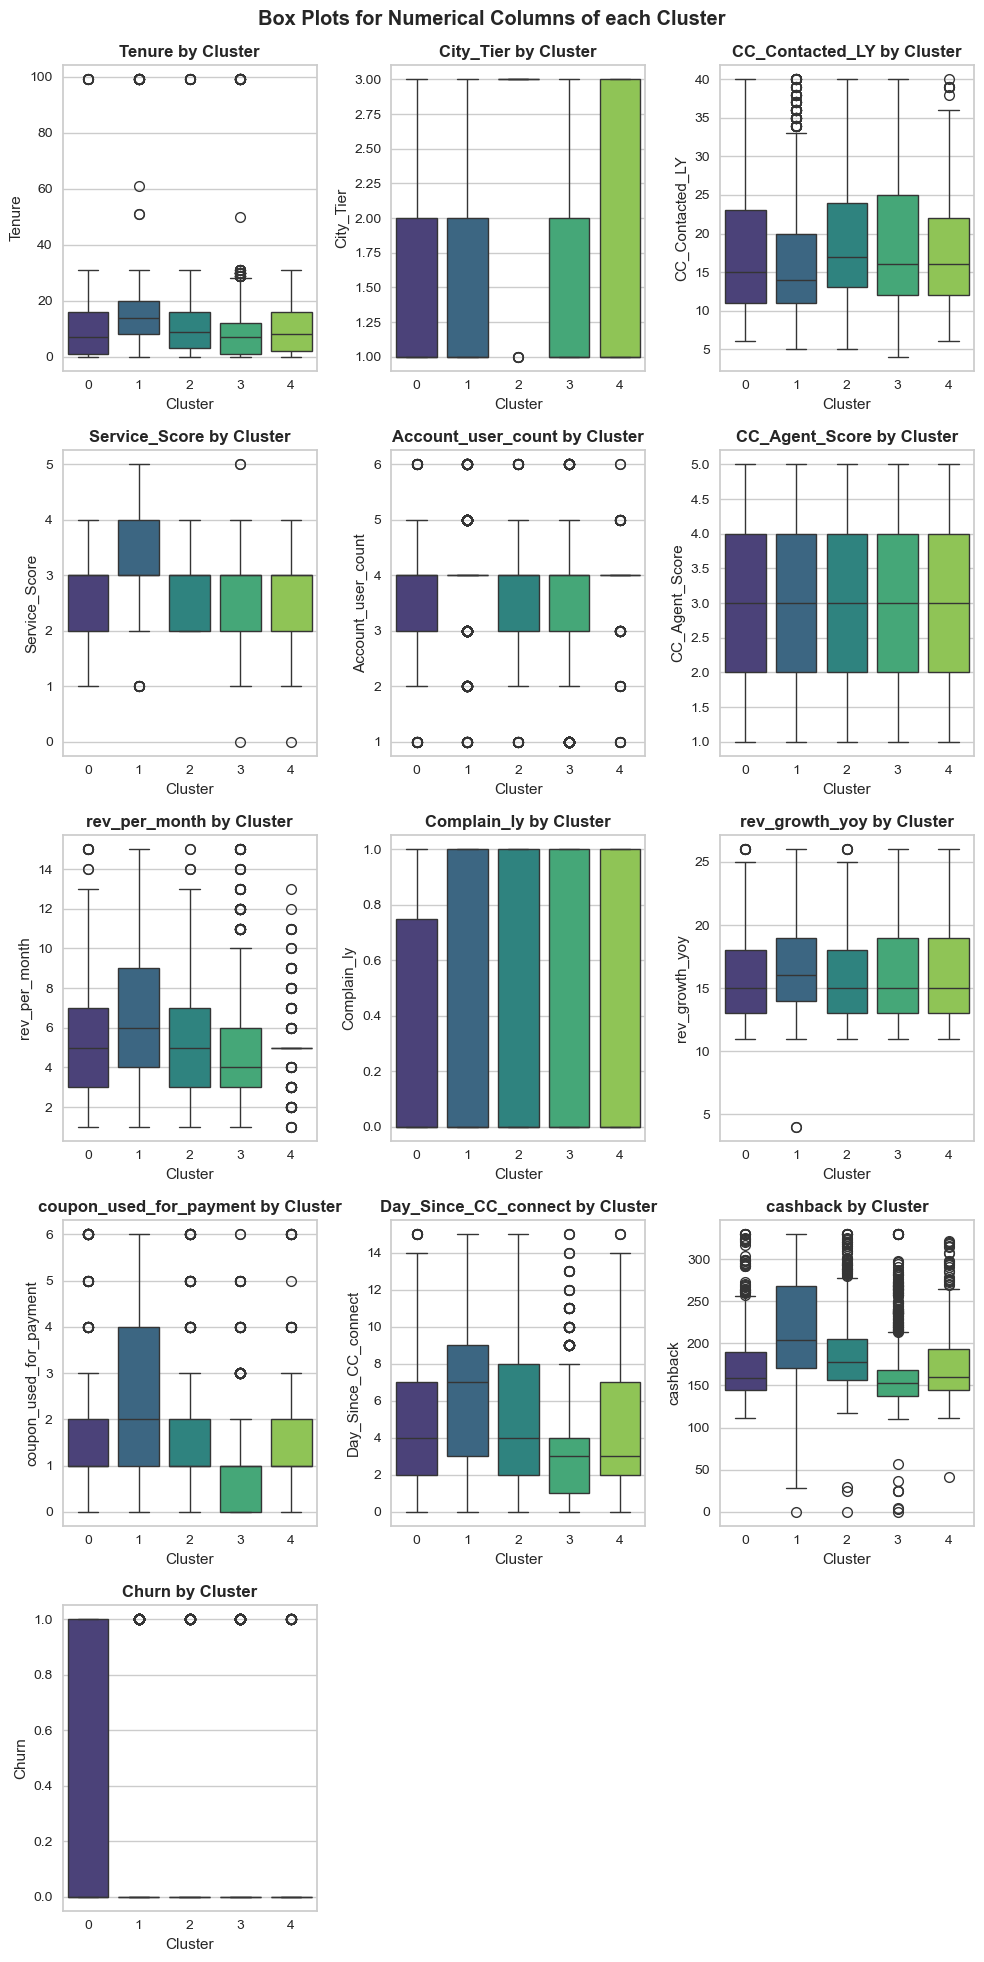

In [11]:
# @title
# Box plots for numeric features excluding KM_Segments

fig, axes = plt.subplots((len(num_columns)//3+1), 3, figsize=(10, 20))
fig.suptitle('Box Plots for Numerical Columns of each Cluster',fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(num_columns):
  if col=='Cluster':
    axes[i].set_visible(False)
  else:
    sns.boxplot(x='Cluster', y=col, data=data_kmeans, ax=axes[i],palette='viridis')
    axes[i].set_title(f'{col} by Cluster',fontweight='bold')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
fig.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()



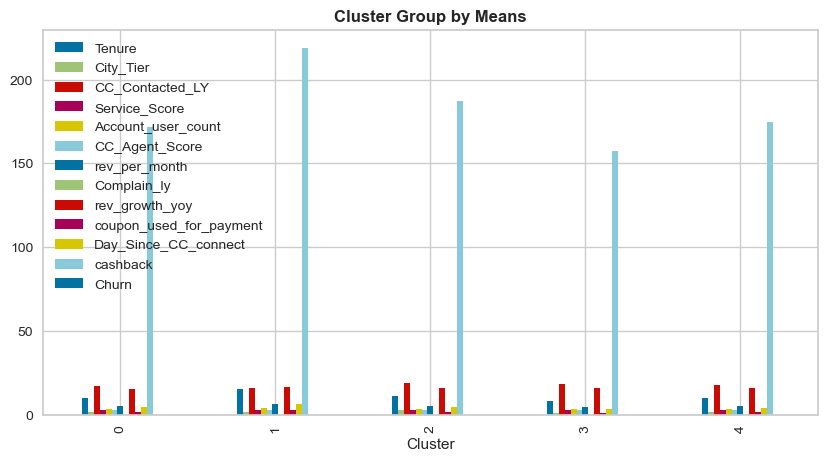

In [12]:
# @title
data_kmeans.groupby("Cluster").mean(numeric_only = True).plot.bar(figsize=(10,5))
plt.title('Cluster Group by Means',fontweight='bold')
plt.show()

The values in cashback are significantly larger compared to those in other columns, so we're splitting the bar plot for better feature analysis.

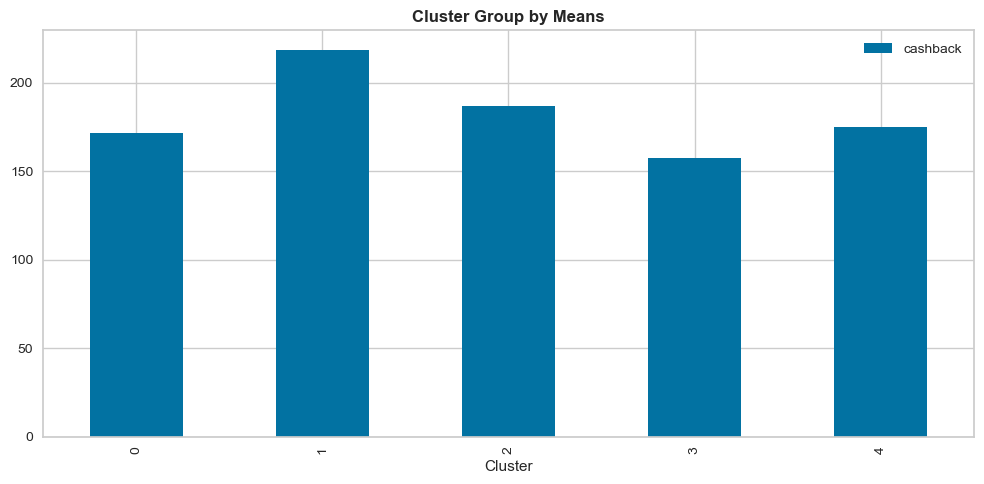

In [13]:
# @title
data_kmeans[['cashback','Cluster']].groupby("Cluster").mean(numeric_only = True).plot.bar(figsize=(10,5))
plt.title('Cluster Group by Means',fontweight='bold')
plt.tight_layout()
plt.show()

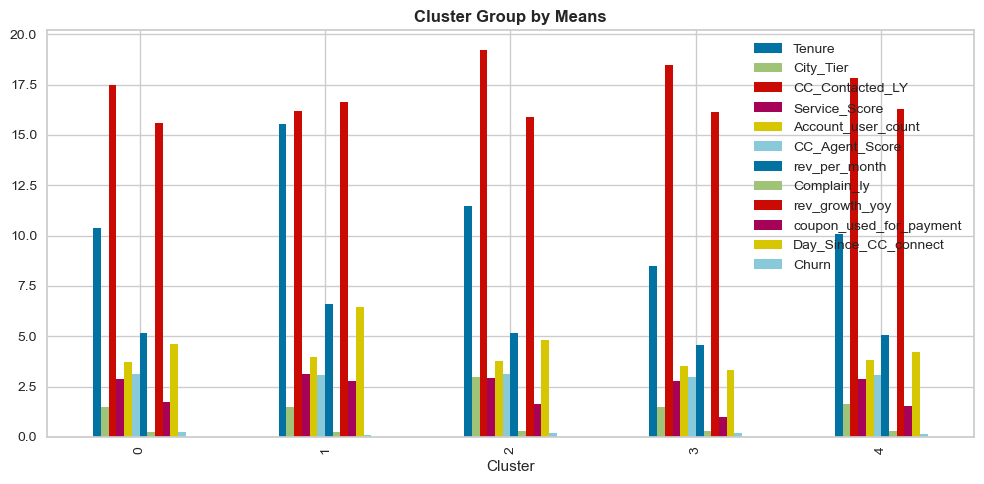

In [14]:
# @title
data_kmeans.drop('cashback',axis=1).groupby("Cluster").mean(numeric_only = True).plot.bar(figsize=(10,5))
plt.title('Cluster Group by Means',fontweight='bold')
plt.tight_layout()
plt.show()

### **Cluster Summary**



Based on the provided cluster profiling for both numerical and categorical variables, the following insights can be drawn:

- **Cluster 0**
  - **Tenure**: Low (3.37 years)
  - **CC_Contacted_LY**: High (18.65 contacts)
  - **Account User Count**: Moderate (3.74 users)
  - **Revenue per Month**: Low (\$5.11K)
  - **Revenue Growth YoY**: Moderate (16.28%)
  - **Coupon Usage for Payment**: Low (1.20 coupons)
  - **Days Since Last CC Connect**: Low (3.17 days)
  - **Cashback**: Low ($162.62)
  - **Characteristics**: Newer customers with recent engagement, low revenue, and minimal coupon usage. Likely need proactive engagement to increase loyalty and spending.

- **Cluster 1**
  - **Tenure**: High (18.14 years)
  - **CC_Contacted_LY**: Moderate (15.19 contacts)
  - **Account User Count**: High (3.94 users)
  - **Revenue per Month**: High (\$8.54K)
  - **Revenue Growth YoY**: Moderate (16.11%)
  - **Coupon Usage for Payment**: High (4.36 coupons)
  - **Days Since Last CC Connect**: High (7.93 days)
  - **Cashback**: High ($298.56)
  - **Characteristics**: Long-term customers with high revenue and coupon usage but less frequent engagement. Valuable segment requiring retention strategies to maintain loyalty.

- **Cluster 2**
  - **Tenure**: Moderate (13.33 years)
  - **CC_Contacted_LY**: High (18.40 contacts)
  - **Account User Count**: Moderate (3.63 users)
  - **Revenue per Month**: Moderate ($5.41K)
  - **Revenue Growth YoY**: Moderate (16.30%)
  - **Coupon Usage for Payment**: Moderate (1.31 coupons)
  - **Days Since Last CC Connect**: Moderate (4.28 days)
  - **Cashback**: Moderate (\$181.19)
  - **Characteristics**: Mid-term customers with balanced engagement, moderate revenue, and coupon usage. Potential for growth through targeted offers.

- **Cluster 3**
  - **Tenure**: Moderate (13.24 years)
  - **CC_Contacted_LY**: High (17.84 contacts)
  - **Account User Count**: Moderate (3.58 users)
  - **Revenue per Month**: Moderate ($7.53K)
  - **Revenue Growth YoY**: Moderate (16.07%)
  - **Coupon Usage for Payment**: Moderate (1.45 coupons)
  - **Days Since Last CC Connect**: Moderate (4.66 days)
  - **Cashback**: Moderate (\$182.89)
  - **Characteristics**: Mid-term customers with slightly higher revenue and engagement compared to Cluster 2. Likely to respond well to loyalty programs and personalized offers.

- **Summary**
  - **Cluster 0**: Focus on increasing engagement and revenue through targeted campaigns and promotions.
  - **Cluster 1**: Strengthen retention strategies to maintain high revenue and loyalty.
  - **Cluster 2 & 3**: Enhance customer experience with personalized offers to drive growth and increase coupon usage.

### **Key Insights from Clustering**


- **Cluster 0 (Newer Customers)**:
  - **Characteristics**: Low tenure, recent engagement, low revenue, and minimal coupon usage.
  - **Insight**: These customers are new and have low spending but are actively engaged. They represent an opportunity to increase loyalty and revenue through targeted campaigns.

- **Cluster 1 (Long-Term Customers)**:
  - **Characteristics**: High tenure, high revenue, high coupon usage, but less frequent engagement.
  - **Insight**: These are loyal, high-value customers who generate significant revenue. However, their engagement is declining, which could lead to churn if not addressed.

- **Cluster 2 (Mid-Term Customers)**:
  - **Characteristics**: Moderate tenure, balanced engagement, moderate revenue, and coupon usage.
  - **Insight**: This segment has steady revenue and engagement but shows potential for growth through personalized offers and improved customer experience.

- **Cluster 3 (Mid-Term Customers with Higher Engagement)**:
  - **Characteristics**: Moderate tenure, higher engagement, moderate revenue, and coupon usage compared to Cluster 2.
  - **Insight**: These customers are more engaged than Cluster 2 and are likely to respond well to loyalty programs and personalized offers.